<h1 align='center' style='color:green'> Unsupervised Learning</h1>

#### Objective
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

##### Importing the necessary libraries

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [253]:
from sklearn.cluster import KMeans

#### Loading and Preprocessing

##### Loading Iris dataset from sklearn library

In [254]:
from sklearn.datasets import load_iris
iris=load_iris()

In [255]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [256]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [257]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [258]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##### Droping target variable since this is a clustering problem

In [259]:
df['species']=iris.target
df=df.drop(columns=['species'])

##### Basic EDA

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [261]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [262]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### Renaming column names

In [263]:
df=df.rename(columns={'sepal length (cm)' : 'sepal length','sepal width (cm)' : 'sepal width', 'petal length (cm)' : 'petal length', 'petal width (cm)' : 'petal width'})

In [264]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

##### Plotting scatter plot of the dataset

Text(0, 0.5, 'Sepal Width')

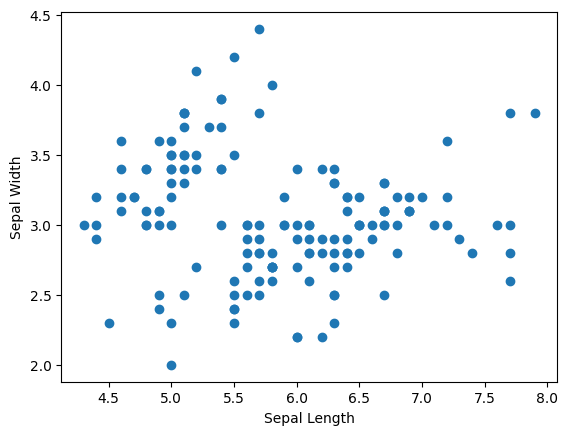

In [265]:
plt.scatter(df['sepal length'],df['sepal width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

### Clustering with K Means

#### Drawing Elbow plot to find the number of clusters

In [266]:
wcss= []   # within-cluster sum of squares
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['sepal length','sepal width']])
    wcss.append(km.inertia_)

wcss

[130.4752666666667,
 58.20409278906672,
 37.05070212765958,
 28.034982153246226,
 26.583339917527294,
 17.80732302011714,
 14.7978591954023,
 12.925989967061952,
 12.852737116931143]

Text(0.5, 1.0, 'Elbow Plot')

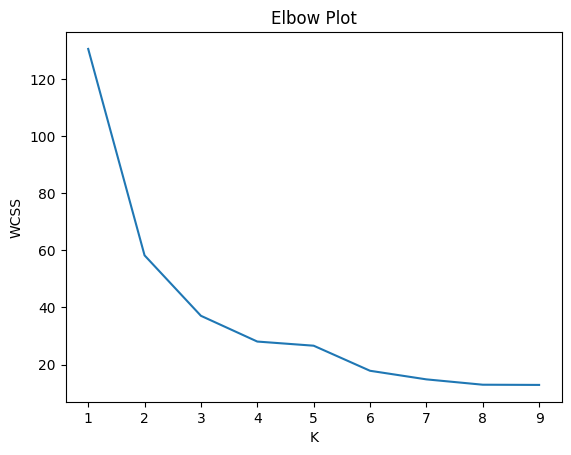

In [267]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng,wcss)
plt.title('Elbow Plot')

#### The point where the within-cluster sum of squares (WCSS) starts to decrease more slowly (the "elbow"). For this dataset, this is typically at 3 clusters.

In [268]:
km=KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [269]:
y_pred=km.predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [270]:
df['cluster']=y_pred
df

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [271]:
# Scatter plot with clusters in different colours.

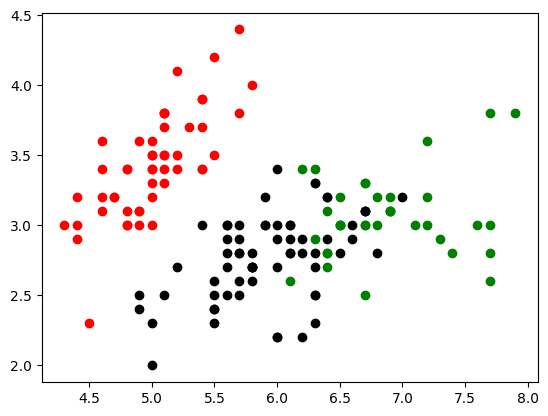

In [272]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sepal length'],df1['sepal width'],color='green')
plt.scatter(df2['sepal length'],df2['sepal width'],color='red')
plt.scatter(df3['sepal length'],df3['sepal width'],color='black')

##### Finding centroids

In [273]:
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

##### Scatter plot with centroids

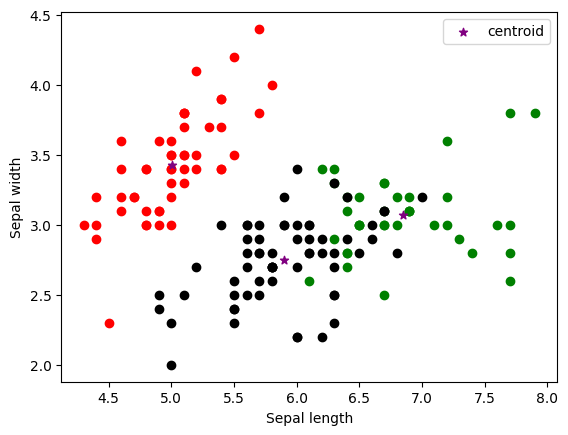

In [274]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sepal length'],df1['sepal width'],color='green')
plt.scatter(df2['sepal length'],df2['sepal width'],color='red')
plt.scatter(df3['sepal length'],df3['sepal width'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

#### Data points are scattered. We can use feature scaling to scale datapoints so as to form three clusters.

#### Feature Scaling

In [275]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

##### Using MinMax Scaler

In [276]:
scaler = MinMaxScaler()

df['sepal width'] = scaler.fit_transform(df[['sepal width']])

df['sepal length'] = scaler.fit_transform(df[['sepal length']])

In [277]:
df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,0.222222,0.625000,1.4,0.2,1
1,0.166667,0.416667,1.4,0.2,1
2,0.111111,0.500000,1.3,0.2,1
3,0.083333,0.458333,1.5,0.2,1
4,0.194444,0.666667,1.4,0.2,1


In [278]:
km1=KMeans(n_clusters=3)
km1_pred=km1.fit_predict(df[['sepal length','sepal width']])
km1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [279]:
df['cluster']=km1_pred

In [280]:
km1.cluster_centers_

array([[0.19897959, 0.60459184],
       [0.390625  , 0.26649306],
       [0.67557652, 0.44654088]])

#### Visualising the Clusters

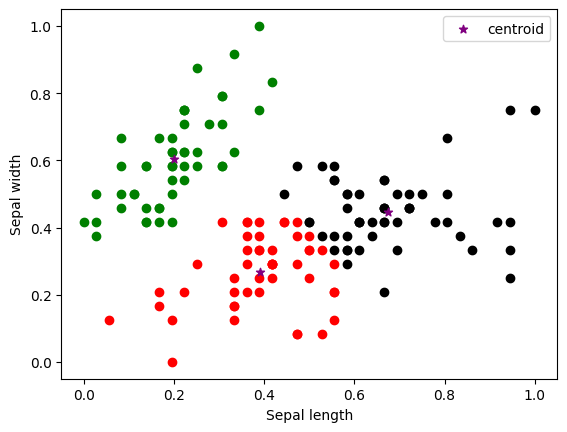

In [281]:
#scatter plot with centroids
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sepal length'],df1['sepal width'],color='green')
plt.scatter(df2['sepal length'],df2['sepal width'],color='red')
plt.scatter(df3['sepal length'],df3['sepal width'],color='black')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

#### Data points are more organised with three clusters and each centroids at the centre of each clusters.

##### Using Standard Scaler

In [282]:
# Standardize the data
scaler_standard = StandardScaler()

df['sepal width'] = scaler_standard.fit_transform(df[['sepal width']])

df['sepal length'] = scaler_standard.fit_transform(df[['sepal length']])

In [283]:
df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,-0.900681,1.019004,1.4,0.2,0
1,-1.143017,-0.131979,1.4,0.2,0
2,-1.385353,0.328414,1.3,0.2,0
3,-1.506521,0.098217,1.5,0.2,0
4,-1.021849,1.249201,1.4,0.2,0


In [284]:
km2=KMeans(n_clusters=3)
km2_pred=km2.fit_predict(df[['sepal length','sepal width']])
km2_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [285]:
df['cluster']=km2_pred

In [286]:
km2.cluster_centers_

array([[ 1.09616533,  0.08900942],
       [-0.11190209, -0.95797964],
       [-1.00206653,  0.90625492]])

#### Visualising the Clusters

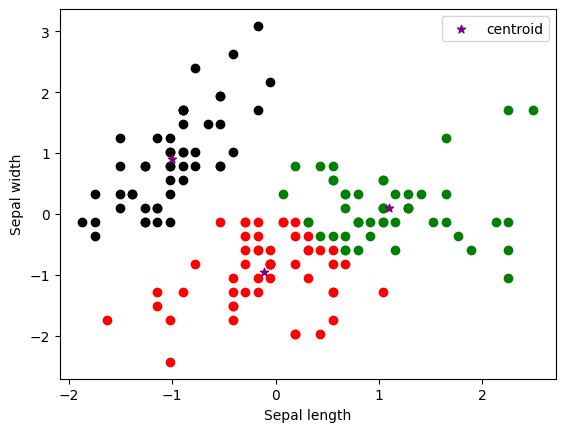

In [287]:
#scatter plot with centroids
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sepal length'],df1['sepal width'],color='green')
plt.scatter(df2['sepal length'],df2['sepal width'],color='red')
plt.scatter(df3['sepal length'],df3['sepal width'],color='black')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

##### Silhouette coefficient

In [288]:
from sklearn.metrics import silhouette_score
s= []
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(df[['sepal length','sepal width']])
    s.append(silhouette_score(df[['sepal length','sepal width']], km_pred))

s

[0.4478710793938968,
 0.43291250979095813,
 0.3994892350650226,
 0.36174267039170693,
 0.3664443560199423,
 0.36864772013319225,
 0.40912656550896365,
 0.4142446117649894,
 0.39288562696667073]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

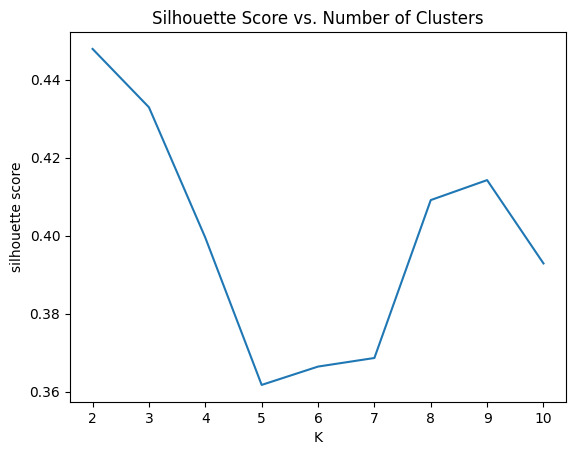

In [289]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

#### To build the best model, we have to identify the number of clusters with the highest silhouette score. For the Iris dataset, the silhouette score often peaks at 2 or 3 clusters.

#### The Iris dataset contains three classes of iris plants, which form relatively distinct clusters. K-means aims to partition data into clusters where each data point belongs to the cluster with the nearest mean, making it effective for datasets with such natural groupings. The Iris dataset has only four features (sepal length, sepal width, petal length, and petal width). So, it has low Dimensionality making it easier for K-means to perform well without the need for dimensionality reduction techniques.

# Hierarchical Clustering

##### Finding the number of clusters using dendrogram

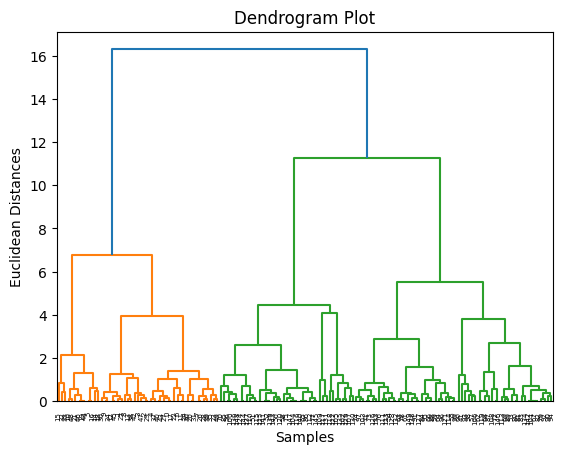

In [290]:
# Dendrogram plot
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(df[['sepal length','sepal width']], method="ward"))

plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Samples")
plt.show()

#### Inspecting the dendrogram to identify the longest vertical distance that can be cut horizontally. For the Iris dataset, this typically suggests around 3 clusters.

In [291]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(df[['sepal length','sepal width']])
hc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [292]:
df['cluster']=hc_pred
df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,-0.900681,1.019004,1.4,0.2,0
1,-1.143017,-0.131979,1.4,0.2,0
2,-1.385353,0.328414,1.3,0.2,0
3,-1.506521,0.098217,1.5,0.2,0
4,-1.021849,1.249201,1.4,0.2,0


#### Visualising the clusters

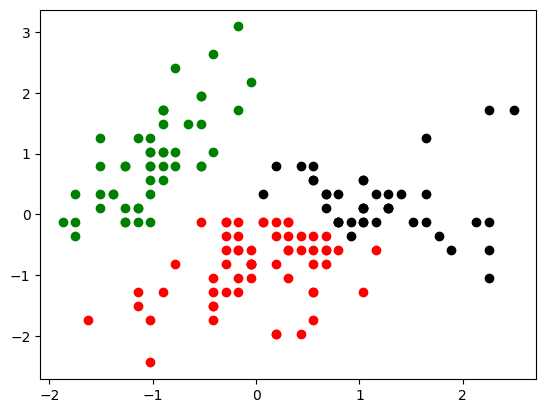

In [293]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sepal length'],df1['sepal width'],color='green')
plt.scatter(df2['sepal length'],df2['sepal width'],color='red')
plt.scatter(df3['sepal length'],df3['sepal width'],color='black')

##### Silhoutte Analysis

In [294]:
from sklearn.metrics import silhouette_score
s=[]
k_rng=range(2,11)

for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict((df[['sepal length','sepal width']]))
    s.append(silhouette_score(df[['sepal length','sepal width']], hc_pred))

s

[0.4495393803331249,
 0.43859951076277204,
 0.4206055503969728,
 0.35189721538254576,
 0.36132306223436095,
 0.3853249261110996,
 0.3818153463244763,
 0.39604555133447367,
 0.38327827443329043]

#### Clusters with the highest silhouette score is 2. For the Iris dataset, the silhouette score often peaks at 2 or 3 clusters.

#### The Iris dataset is relatively small, with 150 samples, making hierarchical clustering computationally feasible even with the algorithm's higher complexity compared to K-means.  The dendrogram provides a visual representation of how clusters are formed and merged, which can be more intuitive than the centroid-based representation in K-means. 